In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 895 kB 51.4 MB/s 
     |████████████████████████████████| 596 kB 49.9 MB/s 
     |████████████████████████████████| 6.6 MB 40.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# ***Importing the tools***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')

# ***Importing the dataset from Drive***

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#df=pd.read_csv('/content/gdrive/MyDrive/BERT_Final_3329.csv', delimiter=';', encoding='cp437')
df=pd.read_csv('/content/gdrive/MyDrive/VR_4/V4_DATA.csv', delimiter=';', encoding='cp437')
df

Pull_id_1                                            Title_1  \
0         14082   provider/fastly: Make request_condition optional   
1          6533  add `validate_credentials` option to provider-aws   
2         12737                        Update environments.html.md   
3          7557        Remove redundant const from command package   
4          6956  provider/aws: Fixing IAM data source policy ge...   
...         ...                                                ...   
3323      40909                   vendor: Microsoft/hcsshim v0.8.9   
3324      40908         vendor: opencontainers/runtime-spec v1.0.2   
3325      40907              vendor: opencontainers/selinux v1.5.1   
3326      40895                         Dockerfile: bump CRIU 3.14   
3327      40681   [19.03 backport] Move schema1 deprecation notice   

                                              Content_1  Pull_id_2  \
0     Makes the request_condition setting optional f...      14103   
1     My dev team is planning to use Terraform to ma...       7874   
2     kind of confusing, example right below is diff...      12781   
3     Replace usages of DefaultDataDir with the equi...       7666   
4     Just re-submitting this as a new PR, this was ...       7785   
...                                                 ...        ...   
3323  full diff: microsoft/hcsshim@v0.8.7...v0.8.9\n...      40714   
3324  full diff: opencontainers/runtime-spec@29686db...      40712   
3325  full diff: opencontainers/selinux@v1.3.3...v1....      40711   
3326  full diff: checkpoint-restore/criu@v3.13...v3....      40694   
3327  backport of #40671\nfixes docker/for-linux#942...      40683   

                                                Title_2  \
0     provider/fastly Changes setting conditionals t...   
1            Skip IAM/STS validation and metadata check   
2     Documentation Update: Fix a code sample that u...   
3     command: Remove second DefaultDataDirectory const   
4          provider/aws: Normalize IAM policy documents   
...                                                 ...   
3323             Add DefaultAddressPools to docker info   
3324      Fix CPU Stat value UsageInUsermode on Windows   
3325  merge default address pool flags with daemon c...   
3326       switch to moby/sys/{mount,mountinfo} part II   
3327                 vendor: vishvananda/netlink v1.1.0   

                                              Content_2  Label  
0     Allows the user to create both request_setting...      1  
1     Skip IAM/STS validation and metadata check\n\n...      1  
2     Reasoning for docs update\nterraform env creat...      1  
3                              No description provided.      1  
4     Fixes #3634 and fixes #7495.\nTwo normalizatio...      1  
...                                                 ...    ...  
3323  - What I did\nThis PR will enhance docker info...      0  
3324  - What I did\nFix CPU Stat value UsageInUsermo...      0  
3325  - What I did\nFixes #40388\n\n\nif the given c...      0  
3326  This PR finishes the replacement of the pkg/mo...      0  
3327  vishvananda/netlink: vishvananda/netlink@v1.0....      0  

[3328 rows x 7 columns]

In [ ]:
#lire la base des données ligne par ligne 
pd.set_option('display.max_rows',df.shape[0]+1)
df

Pull_id_1                                            Title_1  \
0         14082   provider/fastly: Make request_condition optional   
1          6533  add `validate_credentials` option to provider-aws   
2         12737                        Update environments.html.md   
3          7557        Remove redundant const from command package   
4          6956  provider/aws: Fixing IAM data source policy ge...   
5          9482  provider/aws Skip importing routes for VPC end...   
6          2571       provider/aws: Allow ELB name to be generated   
7          3860                 provider/aws: Lb cookie stickiness   
8         13852    command: Add flag for updating modules on init.   
9         12829                        Fix ECS field inconsistency   
10         1285  Make the device name for attached disks equal ...   
11         1952                         Add support for SNS topics   
12         1697   provider/gce: Convert instance scopes to TypeSet   
13         2086  provider/aws: Add IAM Server Certificate resource   
14         4780                       AWS SQS policy normalization   
15        11677   provider/aws: Fix OnceADayWindowFormat Validator   
16         2738  provider/aws: Network Interface private ips ca...   
17         3509  Implement restart policy support in Docker pro...   
18         4662      [WIP] provider/azurerm: add dns zone resource   
19         1801           switch to updated aws-sdk-go credentials   
20         5177                        Update Travis to use Go 1.6   
21         3259              provider/aws: CloudFront Distribution   
22         9789  `instance_profile` is a required parameter whe...   
23         1214     provider/aws: expose Route 53 zone nameservers   
24         7617  provider/aws: Added the ability to import aws_...   
25         1526  AWS/Route53Zone - create private hosted zone a...   
26        14263            Propagate AWS CodePipeline action roles   
27         1357  Breaking security group rules out into it's ow...   
28         3663       get profile name even if profile path exists   
29         1618  provider/aws: Fix issue with updating VPC Secu...   
30          339                                    Aws volume size   
31        11093  provider/aws require db option group name to b...   
32         8791  provider/azurerm: Fixes for azurerm subnet pro...   
33         5850    provider/aws: Add support for AWSConfig service   
34         1888        provider/aws: adding support for SQS queues   
35         6503  Use the new AWSClient.accountid when generatin...   
36         2791          google: Expand tilde in account_file path   
37         1644  Bug: Only prefix hashcode with TypeSet diff ma...   
38        14190  provider/google: Move 404 checking into a func...   
39         7485  helper/schema: Make nested Set(s) in List(s) w...   
40         8948  Correct Proxy setting for openstack provider: ...   
41        10870  provider/aws: fix the datasource aws_route_tab...   
42         5269       add resource aws_rds_cluster_parameter_group   
43         9463  provider/aws: Support S3 bucket object upload ...   
44        12544  Update buffer swap test to use better variable...   
45         8953          readline: concievably typo in readline.js   
46        13570             doc: fix out of date napi_callback doc   
47         6788                               upgrade npm to 3.9.0   
48         4975             feature: Add Promises interface for fs   
49         9351                   LICENSE update from dependencies   
50         2312                  tls: fix session resumption check   
51         9482        doc: fix minor style issue in code examples   
52         5003          doc: fix anchor links from stream to HTTP   
53         4110                       deps: upgrade to npm 2.14.12   
54         5519       build: remove --quiet from eslint invocation   
55         1936                          net: Fixing error message   
56          533 

In [ ]:
#voir les valeurs manquantes
df.isnull().sum().sort_values(ascending=False)

Pull_id_1    0
Title_1      0
Content_1    0
Pull_id_2    0
Title_2      0
Content_2    0
Label        0
dtype: int64

# ***Loading the Pre-trained BERT model***

In [ ]:
import time
start = time.time()

model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# ***Remove stop words***

In [ ]:
df['Title_1']= df['Title_1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

In [ ]:
df['Title_2']= df['Title_2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

In [ ]:
df['Content_1']= df['Content_1'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

In [ ]:
df['Content_2']= df['Content_2'].str.replace(r'i' 'me' 'my' 'myself' 'we' 
                                         'our' 'ours' 'ourselves' 'you' 'your' 'yours' 'yourself''yourselves' 'they' 'we' 'him' 'he' 'him' 'his' 'himself' 'she' 'her' 'hers' 'herself' 'it''its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves'  'what' 'which' 'who' 'whom' 'this' 'that'
                                         'these' 'those' 'am' 'is' 'are' 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does' 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until' 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into' 'through' 
                                         'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up' 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then' 'once'  'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both' 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only' 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don' 'should' 'now'
                                         'java' 'com' 'org' ,'')

# ***Remove Digits:***

In [ ]:
df['Title_1']= df['Title_1'].str.replace(r'0', '')
df['Title_1']= df['Title_1'].str.replace(r'1', '')
df['Title_1']= df['Title_1'].str.replace(r'2', '')
df['Title_1']= df['Title_1'].str.replace(r'3', '')
df['Title_1']= df['Title_1'].str.replace(r'4', '')
df['Title_1']= df['Title_1'].str.replace(r'5', '')
df['Title_1']= df['Title_1'].str.replace(r'6', '')
df['Title_1']= df['Title_1'].str.replace(r'7', '')
df['Title_1']= df['Title_1'].str.replace(r'8', '')
df['Title_1']= df['Title_1'].str.replace(r'9', '')

In [ ]:
df['Title_2']= df['Title_2'].str.replace(r'0', '')
df['Title_2']= df['Title_2'].str.replace(r'1', '')
df['Title_2']= df['Title_2'].str.replace(r'2', '')
df['Title_2']= df['Title_2'].str.replace(r'3', '')
df['Title_2']= df['Title_2'].str.replace(r'4', '')
df['Title_2']= df['Title_2'].str.replace(r'5', '')
df['Title_2']= df['Title_2'].str.replace(r'6', '')
df['Title_2']= df['Title_2'].str.replace(r'7', '')
df['Title_2']= df['Title_2'].str.replace(r'8', '')
df['Title_2']= df['Title_2'].str.replace(r'9', '')

In [ ]:
df['Content_1']= df['Content_1'].str.replace(r'0', '')
df['Content_1']= df['Content_1'].str.replace(r'1', '')
df['Content_1']= df['Content_1'].str.replace(r'2', '')
df['Content_1']= df['Content_1'].str.replace(r'3', '')
df['Content_1']= df['Content_1'].str.replace(r'4', '')
df['Content_1']= df['Content_1'].str.replace(r'5', '')
df['Content_1']= df['Content_1'].str.replace(r'6', '')
df['Content_1']= df['Content_1'].str.replace(r'7', '')
df['Content_1']= df['Content_1'].str.replace(r'8', '')
df['Content_1']= df['Content_1'].str.replace(r'9', '')

In [ ]:
df['Content_2']= df['Content_2'].str.replace(r'0', '')
df['Content_2']= df['Content_2'].str.replace(r'1', '')
df['Content_2']= df['Content_2'].str.replace(r'2', '')
df['Content_2']= df['Content_2'].str.replace(r'3', '')
df['Content_2']= df['Content_2'].str.replace(r'4', '')
df['Content_2']= df['Content_2'].str.replace(r'5', '')
df['Content_2']= df['Content_2'].str.replace(r'6', '')
df['Content_2']= df['Content_2'].str.replace(r'7', '')
df['Content_2']= df['Content_2'].str.replace(r'8', '')
df['Content_2']= df['Content_2'].str.replace(r'9', '')

# ***Remove special characters***

In [ ]:
df['Title_1']= df['Title_1'].str.replace(r'/', '')
df['Title_1']= df['Title_1'].str.replace(r'@', '')
df['Title_1']= df['Title_1'].str.replace(r'!', '')
df['Title_1']= df['Title_1'].str.replace(r'+', '')
df['Title_1']= df['Title_1'].str.replace(r'-', '')
df['Title_1']= df['Title_1'].str.replace(r'/', '')
df['Title_1']= df['Title_1'].str.replace(r':', '')
df['Title_1']= df['Title_1'].str.replace(r';', '')
df['Title_1']= df['Title_1'].str.replace(r'>', '')
df['Title_1']= df['Title_1'].str.replace(r'=', '')
df['Title_1']= df['Title_1'].str.replace(r'<', '')
df['Title_1']= df['Title_1'].str.replace(r'(', '')
df['Title_1']= df['Title_1'].str.replace(r')', '')
df['Title_1']= df['Title_1'].str.replace(r'#', '')
df['Title_1']= df['Title_1'].str.replace(r'$', '')
df['Title_1']= df['Title_1'].str.replace(r'*', '')
df['Title_1']= df['Title_1'].str.replace(r'_', '')
df['Title_1']= df['Title_1'].str.replace(r']', '')
df['Title_1']= df['Title_1'].str.replace(r'[', '')
df['Title_1']= df['Title_1'].str.replace(r'{', '')
df['Title_1']= df['Title_1'].str.replace(r'}', '')
df['Title_1']= df['Title_1'].str.replace(r'"', '')
df['Title_1']= df['Title_1'].str.replace(r'&', '')
df['Title_1']= df['Title_1'].str.replace(r'~', '')
df['Title_1']= df['Title_1'].str.replace(r'^', '')
df['Title_1']= df['Title_1'].str.replace(r'°', '')
df['Title_1']= df['Title_1'].str.replace(r'?', '')
df['Title_1']= df['Title_1'].str.replace(r'%', '')

In [ ]:
df['Title_2']= df['Title_2'].str.replace(r'/', '')
df['Title_2']= df['Title_2'].str.replace(r'@', '')
df['Title_2']= df['Title_2'].str.replace(r'!', '')
df['Title_2']= df['Title_2'].str.replace(r'+', '')
df['Title_2']= df['Title_2'].str.replace(r'-', '')
df['Title_2']= df['Title_2'].str.replace(r'/', '')
df['Title_2']= df['Title_2'].str.replace(r':', '')
df['Title_2']= df['Title_2'].str.replace(r';', '')
df['Title_2']= df['Title_2'].str.replace(r'>', '')
df['Title_2']= df['Title_2'].str.replace(r'=', '')
df['Title_2']= df['Title_2'].str.replace(r'<', '')
df['Title_2']= df['Title_2'].str.replace(r'(', '')
df['Title_2']= df['Title_2'].str.replace(r')', '')
df['Title_2']= df['Title_2'].str.replace(r'#', '')
df['Title_2']= df['Title_2'].str.replace(r'$', '')
df['Title_2']= df['Title_2'].str.replace(r'*', '')
df['Title_2']= df['Title_2'].str.replace(r'_', '')
df['Title_2']= df['Title_2'].str.replace(r']', '')
df['Title_2']= df['Title_2'].str.replace(r'[', '')
df['Title_2']= df['Title_2'].str.replace(r'{', '')
df['Title_2']= df['Title_2'].str.replace(r'}', '')
df['Title_2']= df['Title_2'].str.replace(r'"', '')
df['Title_2']= df['Title_2'].str.replace(r'&', '')
df['Title_2']= df['Title_2'].str.replace(r'~', '')
df['Title_2']= df['Title_2'].str.replace(r'^', '')
df['Title_2']= df['Title_2'].str.replace(r'°', '')
df['Title_2']= df['Title_2'].str.replace(r'?', '')
df['Title_2']= df['Title_2'].str.replace(r'%', '')

In [ ]:
df['Content_1']= df['Content_1'].str.replace(r'/', '')
df['Content_1']= df['Content_1'].str.replace(r'@', '')
df['Content_1']= df['Content_1'].str.replace(r'!', '')
df['Content_1']= df['Content_1'].str.replace(r'+', '')
df['Content_1']= df['Content_1'].str.replace(r'-', '')
df['Content_1']= df['Content_1'].str.replace(r'/', '')
df['Content_1']= df['Content_1'].str.replace(r':', '')
df['Content_1']= df['Content_1'].str.replace(r';', '')
df['Content_1']= df['Content_1'].str.replace(r'>', '')
df['Content_1']= df['Content_1'].str.replace(r'=', '')
df['Content_1']= df['Content_1'].str.replace(r'<', '')
df['Content_1']= df['Content_1'].str.replace(r'(', '')
df['Content_1']= df['Content_1'].str.replace(r')', '')
df['Content_1']= df['Content_1'].str.replace(r'#', '')
df['Content_1']= df['Content_1'].str.replace(r'$', '')
df['Content_1']= df['Content_1'].str.replace(r'*', '')
df['Content_1']= df['Content_1'].str.replace(r'_', '')
df['Content_1']= df['Content_1'].str.replace(r']', '')
df['Content_1']= df['Content_1'].str.replace(r'[', '')
df['Content_1']= df['Content_1'].str.replace(r'{', '')
df['Content_1']= df['Content_1'].str.replace(r'}', '')
df['Content_1']= df['Content_1'].str.replace(r'"', '')
df['Content_1']= df['Content_1'].str.replace(r'&', '')
df['Content_1']= df['Content_1'].str.replace(r'~', '')
df['Content_1']= df['Content_1'].str.replace(r'^', '')
df['Content_1']= df['Content_1'].str.replace(r'°', '')
df['Content_1']= df['Content_1'].str.replace(r'?', '')
df['Content_1']= df['Content_1'].str.replace(r'%', '')

In [ ]:
df['Content_2']= df['Content_2'].str.replace(r'/', '')
df['Content_2']= df['Content_2'].str.replace(r'@', '')
df['Content_2']= df['Content_2'].str.replace(r'!', '')
df['Content_2']= df['Content_2'].str.replace(r'+', '')
df['Content_2']= df['Content_2'].str.replace(r'-', '')
df['Content_2']= df['Content_2'].str.replace(r'/', '')
df['Content_2']= df['Content_2'].str.replace(r':', '')
df['Content_2']= df['Content_2'].str.replace(r';', '')
df['Content_2']= df['Content_2'].str.replace(r'>', '')
df['Content_2']= df['Content_2'].str.replace(r'=', '')
df['Content_2']= df['Content_2'].str.replace(r'<', '')
df['Content_2']= df['Content_2'].str.replace(r'(', '')
df['Content_2']= df['Content_2'].str.replace(r')', '')
df['Content_2']= df['Content_2'].str.replace(r'#', '')
df['Content_2']= df['Content_2'].str.replace(r'$', '')
df['Content_2']= df['Content_2'].str.replace(r'*', '')
df['Content_2']= df['Content_2'].str.replace(r'_', '')
df['Content_2']= df['Content_2'].str.replace(r']', '')
df['Content_2']= df['Content_2'].str.replace(r'[', '')
df['Content_2']= df['Content_2'].str.replace(r'{', '')
df['Content_2']= df['Content_2'].str.replace(r'}', '')
df['Content_2']= df['Content_2'].str.replace(r'"', '')
df['Content_2']= df['Content_2'].str.replace(r'&', '')
df['Content_2']= df['Content_2'].str.replace(r'~', '')
df['Content_2']= df['Content_2'].str.replace(r'^', '')
df['Content_2']= df['Content_2'].str.replace(r'°', '')
df['Content_2']= df['Content_2'].str.replace(r'?', '')
df['Content_2']= df['Content_2'].str.replace(r'%', '')

In [ ]:
#lire la base des données ligne par ligne 
pd.set_option('display.max_rows',df.shape[0]+1)
df

Pull_id_1                                            Title_1  \
0         14082      providerfastly Make requestcondition optional   
1          6533    add `validatecredentials` option to provideraws   
2         12737                        Update environments.html.md   
3          7557        Remove redundant const from command package   
4          6956  provideraws Fixing IAM data source policy gene...   
5          9482  provideraws Skip importing routes for VPC endp...   
6          2571         provideraws Allow ELB name to be generated   
7          3860                   provideraws Lb cookie stickiness   
8         13852     command Add flag for updating modules on init.   
9         12829                        Fix ECS field inconsistency   
10         1285  Make the device name for attached disks equal ...   
11         1952                         Add support for SNS topics   
12         1697     providergce Convert instance scopes to TypeSet   
13         2086    provideraws Add IAM Server Certificate resource   
14         4780                       AWS SQS policy normalization   
15        11677     provideraws Fix OnceADayWindowFormat Validator   
16         2738  provideraws Network Interface private ips can ...   
17         3509  Implement restart policy support in Docker pro...   
18         4662          WIP providerazurerm add dns zone resource   
19         1801             switch to updated awssdkgo credentials   
20         5177                          Update Travis to use Go .   
21         3259                provideraws CloudFront Distribution   
22         9789  `instanceprofile` is a required parameter when...   
23         1214         provideraws expose Route  zone nameservers   
24         7617  provideraws Added the ability to import awsiam...   
25         1526  AWSRouteZone  create private hosted zone assoc...   
26        14263            Propagate AWS CodePipeline action roles   
27         1357  Breaking security group rules out into it's ow...   
28         3663       get profile name even if profile path exists   
29         1618  provideraws Fix issue with updating VPC Securi...   
30          339                                    Aws volume size   
31        11093  provideraws require db option group name to be...   
32         8791  providerazurerm Fixes for azurerm subnet prope...   
33         5850      provideraws Add support for AWSConfig service   
34         1888          provideraws adding support for SQS queues   
35         6503  Use the new AWSClient.accountid when generatin...   
36         2791            google Expand tilde in accountfile path   
37         1644  Bug Only prefix hashcode with TypeSet diff mar...   
38        14190  providergoogle Move  checking into a function ...   
39         7485       helperschema Make nested Sets in Lists work    
40         8948  Correct Proxy setting for openstack provider i...   
41        10870  provideraws fix the datasource awsroutetable, ...   
42         5269           add resource awsrdsclusterparametergroup   
43         9463  provideraws Support S bucket object upload wit...   
44        12544  Update buffer swap test to use better variable...   
45         8953           readline concievably typo in readline.js   
46        13570               doc fix out of date napicallback doc   
47         6788                                  upgrade npm to ..   
48         4975              feature Add Promises interface for fs   
49         9351                   LICENSE update from dependencies   
50         2312                   tls fix session resumption check   
51         9482         doc fix minor style issue in code examples   
52         5003           doc fix anchor links from stream to HTTP   
53         4110                             deps upgrade to npm ..   
54         5519          build remove quiet from eslint invocation   
55         1936                           net Fixing error message   
56          533 

# ***Batch ThunderBird***

In [ ]:
df1=df[:200]
df2=df[200:400]
df3=df[400:600]
df4=df[600:800]
df5=df[800:1000]
df6=df[1000:1200]
df7=df[1200:1400]
df8=df[1400:1600]
df9=df[1600:1800]
df10=df[1800:2000]
df11=df[2000:2200]
df12=df[2200:2400]
df13=df[2400:2600]
df14=df[2600:2800]
df15=df[2800:3000]
df16=df[3000:3200]
df17=df[3200:]

# ***Function: _get_segments***

In [ ]:
def _get_segments3(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    first_sep = False
    current_segment_id = 0 
    for token in tokens:
        segments.append(current_segment_id)
        #print(token)
        if token == 102:
            #if first_sep:
                #first_sep = False 
            #else:
           current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

# **df1**

In [ ]:
#Tokenization
pair1= df1['Title_1'] + [" [SEP] "] + df1['Title_2'] 
tokenized1 = pair1.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len1 = 0                 # padding all lists to the same size
for i in tokenized1.values:
    if len(i) > max_len1:
        max_len2 = len(i)
max_len1 =300
padded1 = np.array([i + [0]*(max_len1-len(i)) for i in tokenized1.values])

np.array(padded1).shape # Dimensions of the padded variable
#Masking
attention_mask1 = np.where(padded1 != 0, 1, 0)
attention_mask1.shape
input_ids1 = torch.tensor(padded1)  
attention_mask1 = torch.tensor(attention_mask1)

#Running the model () function through BERT
input_segments1= np.array([_get_segments3(token, max_len1)for token in tokenized1.values])
token_type_ids1 = torch.tensor(input_segments1)
input_segments1 = torch.tensor(input_segments1)

with torch.no_grad():
    last_hidden_states1 = model(input_ids1, attention_mask=attention_mask1, token_type_ids=input_segments1)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features1 = last_hidden_states1[0][:,0,:].numpy()
features1

array([[-0.69638956, -0.16754517, -0.45040026, ..., -0.743632  ,
        -0.2962048 ,  0.40943837],
       [-0.3658816 ,  0.1272574 , -0.37404993, ..., -0.7502343 ,
        -0.24622585,  0.5533547 ],
       [-0.8646725 , -0.42356488, -0.5491156 , ..., -0.5799007 ,
        -0.28552505,  0.45949063],
       ...,
       [-0.36079544, -0.4108654 , -0.12654053, ..., -0.71534204,
        -0.094402  ,  0.3883729 ],
       [-0.6053207 ,  0.24712306, -0.24527639, ..., -0.90908545,
        -0.059678  ,  0.85971105],
       [-0.4305898 ,  0.09765297, -0.37601647, ..., -0.8859647 ,
         0.08358458,  0.776213  ]], dtype=float32)

# ***df2***

In [ ]:
#Tokenization
pair2= df2['Title_1'] + [" [SEP] "] + df2['Title_2']  
tokenized2 = pair2.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len2 = 0                 # padding all lists to the same size
for i in tokenized2.values:
    if len(i) > max_len2:
        max_len2 = len(i)
max_len2 =300
padded2 = np.array([i + [0]*(max_len2-len(i)) for i in tokenized2.values])

np.array(padded2).shape # Dimensions of the padded variable
#Masking
attention_mask2 = np.where(padded2 != 0, 1, 0)
attention_mask2.shape
input_ids2 = torch.tensor(padded2)  
attention_mask2 = torch.tensor(attention_mask2)

#Running the model () function through BERT
input_segments2= np.array([_get_segments3(token, max_len2)for token in tokenized2.values])
token_type_ids2 = torch.tensor(input_segments2)
input_segments2 = torch.tensor(input_segments2)

with torch.no_grad():
    last_hidden_states2 = model(input_ids2, attention_mask=attention_mask2, token_type_ids=input_segments2)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features2 = last_hidden_states2[0][:,0,:].numpy()
features2

array([[-0.9498256 , -0.29820597, -0.7273553 , ..., -1.1162155 ,
         0.40379813,  0.32830468],
       [-0.9585719 , -0.26492065, -0.45638618, ..., -0.97752976,
         0.02310228,  0.4393318 ],
       [-1.1940801 , -0.03372724, -0.50110185, ..., -0.91372895,
         0.22689717,  0.5054466 ],
       ...,
       [-0.26656687,  0.11011333, -0.3053851 , ..., -0.5114708 ,
        -0.05442051,  0.36316082],
       [-0.18251455, -0.2687673 ,  0.04789128, ..., -0.76538515,
         0.14088407,  0.36232454],
       [ 0.10170656, -0.62961775,  0.13481942, ..., -0.3621135 ,
         0.24695739,  0.73580426]], dtype=float32)

# ***df3***

In [ ]:
#Tokenization
pair3= df3['Title_1'] +  [" [SEP] "] + df3['Title_2']  
tokenized3 = pair3.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len3 = 0                 # padding all lists to the same size
for i in tokenized3.values:
    if len(i) > max_len3:
        max_len3 = len(i)
max_len3 =300
padded3 = np.array([i + [0]*(max_len3-len(i)) for i in tokenized3.values])

np.array(padded3).shape # Dimensions of the padded variable
#Masking
attention_mask3 = np.where(padded3 != 0, 1, 0)
attention_mask3.shape
input_ids3 = torch.tensor(padded3)  
attention_mask3 = torch.tensor(attention_mask3)

#Running the model () function through BERT
input_segments3= np.array([_get_segments3(token, max_len3)for token in tokenized3.values])
token_type_ids3 = torch.tensor(input_segments3)
input_segments3 = torch.tensor(input_segments3)

with torch.no_grad():
    last_hidden_states3 = model(input_ids3, attention_mask=attention_mask3, token_type_ids=input_segments3)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features3 = last_hidden_states3[0][:,0,:].numpy()
features3

array([[-0.4363946 ,  0.0234344 , -0.47100452, ..., -0.6054474 ,
        -0.24282661,  1.0504311 ],
       [-0.8449474 , -0.07113636, -0.5957208 , ..., -1.0036387 ,
         0.3318195 ,  0.18576837],
       [-0.9877548 , -0.20657428, -0.02925792, ..., -0.992999  ,
         0.05997521,  0.33881947],
       ...,
       [-0.91884667, -0.03356267, -0.4653089 , ..., -0.63734835,
         0.5365407 ,  0.7089138 ],
       [-1.0768055 , -0.3611915 , -0.43510148, ..., -0.61802757,
         0.02791546,  0.4807966 ],
       [-1.1252223 , -0.22895171, -0.3541005 , ..., -0.74540615,
         0.07503979,  0.5998206 ]], dtype=float32)

# ***df4***

In [ ]:
#Tokenization
pair4= df4['Title_1'] +  [" [SEP] "] + df4['Title_2'] 
tokenized4 = pair4.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len4 = 0                 # padding all lists to the same size
for i in tokenized4.values:
    if len(i) > max_len4:
        max_len4 = len(i)
max_len4 =300
padded4 = np.array([i + [0]*(max_len4-len(i)) for i in tokenized4.values])

np.array(padded4).shape # Dimensions of the padded variable
#Masking
attention_mask4 = np.where(padded4 != 0, 1, 0)
attention_mask4.shape
input_ids4 = torch.tensor(padded4)  
attention_mask4 = torch.tensor(attention_mask4)

#Running the model () function through BERT
input_segments4= np.array([_get_segments3(token, max_len4)for token in tokenized4.values])
token_type_ids4 = torch.tensor(input_segments4)
input_segments4 = torch.tensor(input_segments4)

with torch.no_grad():
    last_hidden_states4 = model(input_ids4, attention_mask=attention_mask4, token_type_ids=input_segments4)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features4 = last_hidden_states4[0][:,0,:].numpy()
features4

array([[-0.9543866 , -0.11130615, -0.2525055 , ..., -0.9606492 ,
         0.06403232, -0.02888822],
       [-1.2418969 , -0.12012598, -1.0002671 , ..., -0.7446263 ,
         0.03924688,  0.43542874],
       [-0.95574015, -0.23047134, -0.85014516, ..., -0.68944705,
        -0.32332927,  0.34826863],
       ...,
       [-0.357317  , -0.09262954, -0.3052646 , ..., -0.645744  ,
         0.11233853,  0.534735  ],
       [-1.0096649 , -0.24549034, -0.41620523, ..., -1.0233309 ,
         0.01033784,  0.22944109],
       [-0.7963951 , -0.1833177 , -0.1621808 , ..., -0.8898257 ,
        -0.2819275 ,  0.5703069 ]], dtype=float32)

# ***df5***

In [ ]:
#Tokenization
pair5= df5['Title_1'] + [" [SEP] "] + df5['Title_2']  
tokenized5 = pair5.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len5 = 0                 # padding all lists to the same size
for i in tokenized5.values:
    if len(i) > max_len5:
        max_len5 = len(i)
max_len5 =300
padded5 = np.array([i + [0]*(max_len5-len(i)) for i in tokenized5.values])

np.array(padded5).shape # Dimensions of the padded variable
#Masking
attention_mask5 = np.where(padded5 != 0, 1, 0)
attention_mask5.shape
input_ids5 = torch.tensor(padded5)  
attention_mask5 = torch.tensor(attention_mask5)

#Running the model () function through BERT
input_segments5= np.array([_get_segments3(token, max_len5)for token in tokenized5.values])
token_type_ids5 = torch.tensor(input_segments5)
input_segments5 = torch.tensor(input_segments5)

with torch.no_grad():
    last_hidden_states5 = model(input_ids5, attention_mask=attention_mask5, token_type_ids=input_segments5)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features5 = last_hidden_states5[0][:,0,:].numpy()
features5

array([[-0.8485549 , -0.18478914, -0.42243996, ..., -0.980421  ,
         0.01077856,  0.3587566 ],
       [-0.27435237,  0.2722272 , -0.28159016, ..., -0.89649737,
         0.40765813,  0.4714095 ],
       [-0.76724327, -0.19333522, -0.5984561 , ..., -0.8471383 ,
        -0.01279482,  0.37034482],
       ...,
       [-0.7095686 , -0.26791903, -0.46174994, ..., -0.8386236 ,
         0.01621553,  0.5009873 ],
       [-0.76754963, -0.4230835 , -0.24918354, ..., -0.74859005,
        -0.27942947,  0.42884678],
       [-0.79941803,  0.06192128, -0.5350527 , ..., -0.7603266 ,
         0.07199868,  0.5990686 ]], dtype=float32)

# ***df6***

In [ ]:
#Tokenization
pair6= df6['Title_1'] +  [" [SEP] "] + df6['Title_2'] 
tokenized6 = pair6.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len6 = 0                 # padding all lists to the same size
for i in tokenized6.values:
    if len(i) > max_len6:
        max_len6 = len(i)
max_len6 =300
padded6 = np.array([i + [0]*(max_len6-len(i)) for i in tokenized6.values])

np.array(padded6).shape # Dimensions of the padded variable
#Masking
attention_mask6 = np.where(padded6 != 0, 1, 0)
attention_mask6.shape
input_ids6 = torch.tensor(padded6)  
attention_mask6 = torch.tensor(attention_mask6)

#Running the model () function through BERT
input_segments6= np.array([_get_segments3(token, max_len6)for token in tokenized6.values])
token_type_ids6 = torch.tensor(input_segments6)
input_segments6 = torch.tensor(input_segments6)

with torch.no_grad():
    last_hidden_states6 = model(input_ids6, attention_mask=attention_mask6, token_type_ids=input_segments6)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features6 = last_hidden_states6[0][:,0,:].numpy()
features6

array([[-0.638251  , -0.2189784 , -0.63920915, ..., -0.9068417 ,
        -0.04795362,  0.43105504],
       [-0.762038  , -0.34845933, -0.43194693, ..., -0.55365485,
         0.09238565,  0.43920255],
       [-0.77410436,  0.08605165, -0.2938042 , ..., -0.6689137 ,
         0.2890311 ,  0.32211366],
       ...,
       [-0.47443783, -0.10429924,  0.0580263 , ..., -0.44338533,
         0.13262396,  0.18584378],
       [-0.34493002, -0.2688145 , -0.09223185, ..., -0.77165633,
         0.28431568,  0.6427915 ],
       [-0.359315  , -0.52974993, -0.35747057, ..., -0.5514723 ,
        -0.4152226 ,  0.332349  ]], dtype=float32)

# **df7**

In [ ]:
#Tokenization
pair7= df7['Title_1'] +  [" [SEP] "] + df7['Title_2'] 
tokenized7 = pair7.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len7 = 0                 # padding all lists to the same size
for i in tokenized7.values:
    if len(i) > max_len7:
        max_len7 = len(i)
max_len7 =300
padded7 = np.array([i + [0]*(max_len7-len(i)) for i in tokenized7.values])

np.array(padded7).shape # Dimensions of the padded variable
#Masking
attention_mask7 = np.where(padded7 != 0, 1, 0)
attention_mask7.shape
input_ids7 = torch.tensor(padded7)  
attention_mask7 = torch.tensor(attention_mask7)

#Running the model () function through BERT
input_segments7= np.array([_get_segments3(token, max_len7)for token in tokenized7.values])
token_type_ids7 = torch.tensor(input_segments7)
input_segments7 = torch.tensor(input_segments7)

with torch.no_grad():
    last_hidden_states7 = model(input_ids7, attention_mask=attention_mask7, token_type_ids=input_segments7)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features7 = last_hidden_states7[0][:,0,:].numpy()
features7

array([[-0.92936546, -0.34598795, -1.1016848 , ..., -0.9843846 ,
         0.42076105,  0.26622856],
       [-0.5813898 , -0.16062167, -0.43338576, ..., -0.67145866,
        -0.34051868,  0.8793219 ],
       [-0.6712939 , -0.16375689, -0.22133303, ..., -0.7644635 ,
         0.42489955,  0.35406673],
       ...,
       [-0.89629054, -0.21603563, -0.31079108, ..., -0.83240205,
         0.091504  ,  0.3107874 ],
       [-0.56506795, -0.5286835 , -0.13909695, ..., -0.58401465,
         0.08775671,  0.61925805],
       [-0.6579    , -0.09292681, -0.4881106 , ..., -0.9630368 ,
         0.25068298,  0.5508743 ]], dtype=float32)

# ***df8***

In [ ]:
#Tokenization
pair8= df8['Title_1'] + [" [SEP] "] + df8['Title_2']  
tokenized8 = pair8.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len8 = 0                 # padding all lists to the same size
for i in tokenized8.values:
    if len(i) > max_len8:
        max_len8 = len(i)
max_len8 =300
padded8 = np.array([i + [0]*(max_len8-len(i)) for i in tokenized8.values])

np.array(padded8).shape # Dimensions of the padded variable
#Masking
attention_mask8 = np.where(padded8 != 0, 1, 0)
attention_mask8.shape
input_ids8 = torch.tensor(padded8)  
attention_mask8 = torch.tensor(attention_mask8)

#Running the model () function through BERT
input_segments8= np.array([_get_segments3(token, max_len8)for token in tokenized8.values])
token_type_ids8 = torch.tensor(input_segments8)
input_segments8 = torch.tensor(input_segments8)

with torch.no_grad():
    last_hidden_states8 = model(input_ids8, attention_mask=attention_mask8, token_type_ids=input_segments8)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features8 = last_hidden_states8[0][:,0,:].numpy()
features8

array([[-0.8437188 ,  0.07463101, -0.37081212, ..., -0.9735388 ,
         0.18925765,  0.40354943],
       [-0.5511924 , -0.18469843, -0.63354814, ..., -0.92892975,
         0.19366272,  0.36664647],
       [-0.6394569 , -0.35537115, -0.80039376, ..., -0.78523916,
        -0.29482126,  0.52951735],
       ...,
       [-0.9435607 , -0.3161588 , -0.82262224, ..., -0.93108934,
        -0.28356993,  0.7100584 ],
       [-0.44655982, -0.41251597, -0.750958  , ..., -0.23162283,
        -0.3084392 ,  0.822415  ],
       [-0.5422947 ,  0.09151021, -0.23425074, ..., -0.2873069 ,
         0.11093917,  0.758968  ]], dtype=float32)

# ***df9***

In [ ]:
#Tokenization
pair9= df9['Title_1'] +  [" [SEP] "] + df9['Title_2'] 
tokenized9 = pair9.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len9 = 0                 # padding all lists to the same size
for i in tokenized9.values:
    if len(i) > max_len9:
        max_len9 = len(i)
max_len9 =300
padded9 = np.array([i + [0]*(max_len9-len(i)) for i in tokenized9.values])

np.array(padded9).shape # Dimensions of the padded variable
#Masking
attention_mask9 = np.where(padded9 != 0, 1, 0)
attention_mask9.shape
input_ids9 = torch.tensor(padded9)  
attention_mask9 = torch.tensor(attention_mask9)

#Running the model () function through BERT
input_segments9= np.array([_get_segments3(token, max_len9)for token in tokenized9.values])
token_type_ids9 = torch.tensor(input_segments9)
input_segments9 = torch.tensor(input_segments9)

with torch.no_grad():
    last_hidden_states9 = model(input_ids9, attention_mask=attention_mask9, token_type_ids=input_segments9)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features9 = last_hidden_states9[0][:,0,:].numpy()
features9

array([[-1.126793  ,  0.19587226, -0.6978757 , ..., -1.0725315 ,
         0.30108425,  0.4075238 ],
       [-0.68323904, -0.04902697, -0.46643314, ..., -1.0021546 ,
         0.34006226,  0.4299794 ],
       [-0.931038  , -0.27870607, -0.7130661 , ..., -0.75072116,
        -0.2157237 ,  0.4388321 ],
       ...,
       [-0.56510776, -0.33783948, -0.22012588, ..., -0.6085108 ,
         0.13839579,  0.7089106 ],
       [-0.5154146 , -0.41234043, -0.08400451, ..., -0.80614233,
         0.11522101,  0.58517855],
       [-0.6103707 , -0.32652038, -0.2615923 , ..., -0.6901701 ,
        -0.18549423,  0.5024569 ]], dtype=float32)

# **df10**

In [ ]:
#Tokenization
pair10= df10['Title_1'] + [" [SEP] "] + df10['Title_2'] 
tokenized10 = pair10.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len10 = 0                 # padding all lists to the same size
for i in tokenized10.values:
    if len(i) > max_len10:
        max_len10 = len(i)
max_len10 =300
padded10 = np.array([i + [0]*(max_len10-len(i)) for i in tokenized10.values])

np.array(padded10).shape # Dimensions of the padded variable
#Masking
attention_mask10 = np.where(padded10 != 0, 1, 0)
attention_mask10.shape
input_ids10 = torch.tensor(padded10)  
attention_mask10 = torch.tensor(attention_mask10)

#Running the model () function through BERT
input_segments10 = np.array([_get_segments3(token, max_len10)for token in tokenized10.values])
token_type_ids10 = torch.tensor(input_segments10)
input_segments10 = torch.tensor(input_segments10)

with torch.no_grad():
    last_hidden_states10 = model(input_ids10, attention_mask=attention_mask10, token_type_ids=input_segments10)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features10 = last_hidden_states10[0][:,0,:].numpy()
features10

array([[-1.038678  , -0.03160698, -0.80025584, ..., -0.90082943,
         0.45841733,  0.4370946 ],
       [-1.031967  , -0.0688802 , -0.45153114, ..., -1.0504004 ,
         0.10963333,  0.38489553],
       [-0.6674411 , -0.33918652,  0.00896243, ..., -0.9389895 ,
         0.02980659,  0.4468342 ],
       ...,
       [-0.61418253, -0.41728956, -0.23622344, ..., -0.7468896 ,
         0.25347486,  0.6536088 ],
       [-0.5802083 , -0.6707396 , -0.5803061 , ..., -0.6065303 ,
        -0.08763818,  0.32246804],
       [-0.30552754, -0.44257993, -0.03712269, ..., -0.5116732 ,
         0.14636987,  0.62662673]], dtype=float32)

# **df11**

In [ ]:
#Tokenization
pair11= df11['Title_1'] +  [" [SEP] "] + df11['Title_2']  
tokenized11 = pair11.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len11 = 0                 # padding all lists to the same size
for i in tokenized11.values:
    if len(i) > max_len11:
        max_len11 = len(i)
max_len11 =300
padded11 = np.array([i + [0]*(max_len11-len(i)) for i in tokenized11.values])

np.array(padded11).shape # Dimensions of the padded variable
#Masking
attention_mask11 = np.where(padded11 != 0, 1, 0)
attention_mask11.shape
input_ids11 = torch.tensor(padded11)  
attention_mask11 = torch.tensor(attention_mask11)

#Running the model () function through BERT
input_segments11 = np.array([_get_segments3(token, max_len11)for token in tokenized11.values])
token_type_ids11 = torch.tensor(input_segments11)
input_segments11 = torch.tensor(input_segments11)

with torch.no_grad():
    last_hidden_states11 = model(input_ids11, attention_mask=attention_mask11, token_type_ids=input_segments11)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features11 = last_hidden_states11[0][:,0,:].numpy()
features11

array([[-1.042105  ,  0.6481602 , -0.90274847, ..., -0.8564343 ,
         0.57438225,  0.13913359],
       [-0.89210176, -0.27152473, -0.72360826, ..., -0.72795695,
         0.12221122,  0.64661807],
       [-0.6857536 , -0.05450121, -0.6015578 , ..., -0.9393439 ,
        -0.37102532,  0.46505445],
       ...,
       [-0.52382964, -0.16879138, -0.5994225 , ..., -0.7262089 ,
        -0.1265078 ,  0.48686197],
       [-0.28461537, -0.45273212, -0.15597035, ..., -0.7072173 ,
         0.01731719,  0.35434905],
       [-0.70243835, -0.25114277, -0.23495975, ..., -0.6897897 ,
         0.00945556,  0.5090385 ]], dtype=float32)

# **df12**

In [ ]:
#Tokenization
pair12= df12['Title_1'] + [" [SEP] "] + df12['Title_2'] 
tokenized12 = pair12.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len12 = 0                 # padding all lists to the same size
for i in tokenized12.values:
    if len(i) > max_len12:
        max_len12 = len(i)
max_len12 =300
padded12 = np.array([i + [0]*(max_len12-len(i)) for i in tokenized12.values])

np.array(padded12).shape # Dimensions of the padded variable
#Masking
attention_mask12 = np.where(padded12 != 0, 1, 0)
attention_mask12.shape
input_ids12 = torch.tensor(padded12)  
attention_mask12 = torch.tensor(attention_mask12)

#Running the model () function through BERT
input_segments12 = np.array([_get_segments3(token, max_len12)for token in tokenized12.values])
token_type_ids12 = torch.tensor(input_segments12)
input_segments12 = torch.tensor(input_segments12)

with torch.no_grad():
    last_hidden_states12 = model(input_ids12, attention_mask=attention_mask12, token_type_ids=input_segments12)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features12 = last_hidden_states12[0][:,0,:].numpy()
features12

array([[-1.06511   ,  0.05075694, -0.61585003, ..., -0.72430575,
         0.3902277 ,  0.25150758],
       [-0.56989604, -0.44005498, -0.62060404, ..., -0.60270756,
        -0.05465193,  0.690251  ],
       [-0.7593559 , -0.24753718, -0.5642454 , ..., -0.7510949 ,
        -0.08557644,  0.40833417],
       ...,
       [-0.7236768 , -0.27935925, -0.47062945, ..., -0.8519232 ,
        -0.19842933,  0.4133315 ],
       [-0.9235427 , -0.27406287, -0.5824936 , ..., -0.7248392 ,
         0.07354397,  0.6664296 ],
       [-0.73205936, -0.5901651 , -0.69526607, ..., -0.58834076,
        -0.46338606,  0.77749926]], dtype=float32)

# **df13**

In [ ]:
#Tokenization
pair13= df13['Title_1'] +  [" [SEP] "] + df13['Title_2']  
tokenized13 = pair13.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len13 = 0                 # padding all lists to the same size
for i in tokenized13.values:
    if len(i) > max_len13:
        max_len13 = len(i)
max_len13 =300
padded13 = np.array([i + [0]*(max_len13-len(i)) for i in tokenized13.values])

np.array(padded13).shape # Dimensions of the padded variable
#Masking
attention_mask13 = np.where(padded13 != 0, 1, 0)
attention_mask13.shape
input_ids13 = torch.tensor(padded13)  
attention_mask13 = torch.tensor(attention_mask13)

#Running the model () function through BERT
input_segments13 = np.array([_get_segments3(token, max_len13)for token in tokenized13.values])
token_type_ids13 = torch.tensor(input_segments13)
input_segments13 = torch.tensor(input_segments13)

with torch.no_grad():
    last_hidden_states13 = model(input_ids13, attention_mask=attention_mask13, token_type_ids=input_segments13)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features13 = last_hidden_states13[0][:,0,:].numpy()
features13

array([[-1.0539914 , -0.17401718, -0.48888963, ..., -0.63086325,
        -0.01600981,  0.2709932 ],
       [-0.79026157, -0.08617548, -0.86458087, ..., -0.77470934,
         0.21011648,  0.4603958 ],
       [-0.4316428 ,  0.2185292 , -0.09106147, ..., -0.56391615,
        -0.07259228,  0.6824614 ],
       ...,
       [-0.6135146 , -0.34169134, -0.31497616, ..., -0.86560524,
        -0.1979707 ,  0.4896627 ],
       [-0.42345944, -0.05715574, -0.24685687, ..., -0.70064825,
         0.2918278 ,  0.5302189 ],
       [-0.6425046 ,  0.01048762, -0.30362535, ..., -0.48289725,
         0.26330596,  0.18584178]], dtype=float32)

# **df14**

In [ ]:
#Tokenization
pair14= df14['Title_1'] +  [" [SEP] "] + df14['Title_2'] 
tokenized14 = pair14.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len14 = 0                 # padding all lists to the same size
for i in tokenized14.values:
    if len(i) > max_len14:
        max_len14 = len(i)
max_len14 =300
padded14 = np.array([i + [0]*(max_len14-len(i)) for i in tokenized14.values])

np.array(padded14).shape # Dimensions of the padded variable
#Masking
attention_mask14 = np.where(padded14 != 0, 1, 0)
attention_mask14.shape
input_ids14 = torch.tensor(padded14)  
attention_mask14 = torch.tensor(attention_mask14)

#Running the model () function through BERT
input_segments14 = np.array([_get_segments3(token, max_len14)for token in tokenized14.values])
token_type_ids14 = torch.tensor(input_segments14)
input_segments14 = torch.tensor(input_segments14)

with torch.no_grad():
    last_hidden_states14 = model(input_ids14, attention_mask=attention_mask14, token_type_ids=input_segments14)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features14 = last_hidden_states14[0][:,0,:].numpy()
features14

array([[-1.1184981 , -0.38938537, -0.64182866, ..., -0.7303843 ,
        -0.10817499,  0.5164797 ],
       [-0.51495653, -0.566796  , -0.35492116, ..., -0.59996384,
         0.02973399,  0.531326  ],
       [-0.9018824 , -0.16882539, -0.05489022, ..., -0.808447  ,
         0.3762641 ,  0.4686524 ],
       ...,
       [-0.8346513 , -0.62368304, -0.3699442 , ..., -0.47129118,
        -0.21554464,  0.22797297],
       [-0.591889  , -0.50849545, -0.28061125, ..., -0.916381  ,
        -0.18785709,  0.6346004 ],
       [-0.7471888 , -0.7924506 , -0.20213458, ..., -0.5905216 ,
        -0.24500671,  0.3518037 ]], dtype=float32)

# **df15**

In [ ]:
#Tokenization
pair15= df15['Title_1'] +  [" [SEP] "] + df15['Title_2']  
tokenized15 = pair15.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len15 = 0                 # padding all lists to the same size
for i in tokenized15.values:
    if len(i) > max_len15:
        max_len15 = len(i)
max_len15 =300
padded15 = np.array([i + [0]*(max_len15-len(i)) for i in tokenized15.values])

np.array(padded15).shape # Dimensions of the padded variable
#Masking
attention_mask15 = np.where(padded15 != 0, 1, 0)
attention_mask15.shape
input_ids15 = torch.tensor(padded15)  
attention_mask15 = torch.tensor(attention_mask15)

#Running the model () function through BERT
input_segments15 = np.array([_get_segments3(token, max_len15)for token in tokenized15.values])
token_type_ids15 = torch.tensor(input_segments15)
input_segments15 = torch.tensor(input_segments15)

with torch.no_grad():
    last_hidden_states15 = model(input_ids15, attention_mask=attention_mask15, token_type_ids=input_segments15)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features15 = last_hidden_states15[0][:,0,:].numpy()
features15

array([[-0.7586782 , -0.6146186 , -0.8313876 , ..., -0.7105086 ,
        -0.3061582 ,  0.42891377],
       [-0.66297466, -0.45067266, -0.4452755 , ..., -0.38661468,
        -0.16175173,  0.64066833],
       [-0.6641581 , -0.4217384 , -0.6386208 , ..., -0.57438886,
         0.02201679,  0.30599406],
       ...,
       [-0.5075312 , -0.45071247, -0.27760407, ..., -0.7921815 ,
        -0.2364974 ,  0.5734856 ],
       [-0.9221177 , -0.10395342, -0.32577205, ..., -0.7442349 ,
        -0.24300638,  0.6224171 ],
       [-0.20818773, -0.5022829 , -0.37129587, ..., -0.6765558 ,
        -0.1558254 ,  1.0376656 ]], dtype=float32)

# **df16**

In [ ]:
#Tokenization
pair16 = df16['Title_1'] +  [" [SEP] "] + df16['Title_2']  
tokenized16 = pair16.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len16 = 0                 # padding all lists to the same size
for i in tokenized16.values:
    if len(i) > max_len16:
        max_len16 = len(i)
max_len16 =300
padded16 = np.array([i + [0]*(max_len16-len(i)) for i in tokenized16.values])

np.array(padded16).shape # Dimensions of the padded variable
#Masking
attention_mask16 = np.where(padded16 != 0, 1, 0)
attention_mask16.shape
input_ids16 = torch.tensor(padded16)  
attention_mask16 = torch.tensor(attention_mask16)

#Running the model () function through BERT
input_segments16 = np.array([_get_segments3(token, max_len16)for token in tokenized16.values])
token_type_ids16 = torch.tensor(input_segments16)
input_segments16 = torch.tensor(input_segments16)

with torch.no_grad():
    last_hidden_states16 = model(input_ids16, attention_mask=attention_mask16, token_type_ids=input_segments16)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features16 = last_hidden_states16[0][:,0,:].numpy()
features16

array([[-0.6123736 , -0.38009503, -0.11064746, ..., -0.827     ,
         0.14366901,  0.7800519 ],
       [-0.52552164, -0.24302456, -0.09933249, ..., -0.99648005,
         0.14356732,  0.43634805],
       [-0.72225165, -0.23430957, -0.20906344, ..., -0.2887834 ,
        -0.04077942,  0.6566822 ],
       ...,
       [-0.889899  , -0.28425315, -0.10364981, ..., -1.1882867 ,
         0.02281642,  0.36979064],
       [-0.25818557, -0.13008045, -0.04437736, ..., -0.66519773,
         0.21114019,  0.49857876],
       [-0.577322  , -0.25128782, -0.15697213, ..., -0.5020103 ,
        -0.05946374,  0.77014786]], dtype=float32)

# **df17**

In [ ]:
#Tokenization
pair17 = df17['Title_1'] + [" [SEP] "] + df17['Title_2']  
tokenized17 = pair17.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True, max_length=300)))
#Padding
max_len17 = 0                 # padding all lists to the same size
for i in tokenized17.values:
    if len(i) > max_len17:
        max_len17 = len(i)
max_len17 =300
padded17 = np.array([i + [0]*(max_len17-len(i)) for i in tokenized17.values])

np.array(padded17).shape # Dimensions of the padded variable
#Masking
attention_mask17 = np.where(padded17 != 0, 1, 0)
attention_mask17.shape
input_ids17 = torch.tensor(padded17)  
attention_mask17 = torch.tensor(attention_mask17)

#Running the model () function through BERT
input_segments17 = np.array([_get_segments3(token, max_len17)for token in tokenized17.values])
token_type_ids17 = torch.tensor(input_segments17)
input_segments17 = torch.tensor(input_segments17)

with torch.no_grad():
    last_hidden_states17 = model(input_ids17, attention_mask=attention_mask17, token_type_ids=input_segments17)    # <<< 600 rows only !!!
#Slicing the part of the output of BERT : [cls]
features17 = last_hidden_states17[0][:,0,:].numpy()
features17

array([[-0.6248537 , -0.477664  , -0.28052345, ..., -0.50791574,
        -0.15017389,  0.5617772 ],
       [-0.87201273, -0.547967  , -0.46044102, ..., -0.60674495,
        -0.07004366,  0.6859288 ],
       [-0.38990617, -0.5983804 ,  0.02525557, ..., -0.28425094,
         0.1637446 ,  0.82152975],
       ...,
       [-0.49269375, -0.7416322 , -0.34050524, ..., -0.26029778,
         0.0188753 ,  0.88171387],
       [-0.37792566, -0.31114802, -0.04288914, ..., -0.3690542 ,
         0.35383186,  0.5399071 ],
       [-0.4275574 , -0.01466656, -0.36326233, ..., -0.6406434 ,
         0.30946255,  0.2815811 ]], dtype=float32)

# ***Classification***

In [ ]:
features=np.concatenate([features1,features2,features3,features4,features5,features6,features7,features8,features9,features10,features11,features12,features13,features14,features15,features16,features17])

features.shape

Total = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17], ignore_index=True)

labels =Total['Label']
labels

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


# ***Hold out***

In [ ]:
train_features = features[:2662]
train_labels = labels[:2662]
test_features = features[2662:]
test_labels = labels[2662:]

In [ ]:
train_features

array([[-0.69638956, -0.16754517, -0.45040026, ..., -0.743632  ,
        -0.2962048 ,  0.40943837],
       [-0.3658816 ,  0.1272574 , -0.37404993, ..., -0.7502343 ,
        -0.24622585,  0.5533547 ],
       [-0.8646725 , -0.42356488, -0.5491156 , ..., -0.5799007 ,
        -0.28552505,  0.45949063],
       ...,
       [-1.1777831 , -0.49454674, -0.8081739 , ..., -0.8216926 ,
        -0.16985808,  0.23751001],
       [-0.58687127, -0.38698745, -0.6053771 , ..., -0.6695026 ,
        -0.20550743,  0.6228537 ],
       [-0.8384962 , -0.48961076, -0.15172112, ..., -0.7974804 ,
        -0.15743753,  0.4563453 ]], dtype=float32)

In [ ]:
train_labels

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [ ]:
test_features

array([[-1.0687926 , -0.13607779, -1.1671757 , ..., -0.96355176,
         0.36620587,  0.36411887],
       [-0.3570374 , -0.2919095 , -0.78305733, ..., -0.7209114 ,
        -0.20603806,  0.41484746],
       [-0.96851045, -0.5301754 , -0.66901606, ..., -0.57141644,
         0.02854343,  0.4113267 ],
       ...,
       [-0.49269375, -0.7416322 , -0.34050524, ..., -0.26029778,
         0.0188753 ,  0.88171387],
       [-0.37792566, -0.31114802, -0.04288914, ..., -0.3690542 ,
         0.35383186,  0.5399071 ],
       [-0.4275574 , -0.01466656, -0.36326233, ..., -0.6406434 ,
         0.30946255,  0.2815811 ]], dtype=float32)

In [ ]:
test_labels

2662    1
2663    1
2664    1
2665    1
2666    1
2667    1
2668    1
2669    1
2670    1
2671    1
2672    1
2673    1
2674    1
2675    1
2676    1
2677    1
2678    1
2679    1
2680    1
2681    1
2682    1
2683    1
2684    1
2685    1
2686    1
2687    1
2688    1
2689    1
2690    1
2691    1
2692    1
2693    1
2694    1
2695    1
2696    1
2697    1
2698    1
2699    1
2700    1
2701    1
2702    1
2703    1
2704    1
2705    1
2706    1
2707    1
2708    1
2709    1
2710    1
2711    1
2712    1
2713    1
2714    1
2715    1
2716    1
2717    1
2718    1
2719    1
2720    1
2721    1
2722    1
2723    1
2724    1
2725    1
2726    1
2727    1
2728    1
2729    1
2730    1
2731    1
2732    1
2733    1
2734    1
2735    1
2736    1
2737    1
2738    1
2739    1
2740    1
2741    1
2742    1
2743    1
2744    1
2745    1
2746    1
2747    1
2748    1
2749    1
2750    1
2751    1
2752    1
2753    1
2754    1
2755    1
2756    1
2757    1
2758    1
2759    1
2760    1
2761    1


In [ ]:
#train_features,test_features,train_labels,test_labels= train_test_split(features,labels,test_size=0.2, random_state=2)
#print('Number of data points in train data:', train_features.shape[0])
#print('Number of data points in train data:', train_labels.shape[0])
#print('Number of data points in test data:', train_features.shape[0])
#print('Number of data points in test data:', train_labels.shape[0])
#print(features.shape,train_features.shape,test_features.shape)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(test_labels, y_predLr):
    C = confusion_matrix(test_labels, y_predLr)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [0,1]
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True,  fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# ***LogisticRegression Optimized***

In [ ]:
#n_splits=2
#cross_val_score=5
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(train_features, train_labels)
print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 5.263252631578947}
best scrores:  0.7948990675563203


In [ ]:
lr_clf = LogisticRegression(C=10.52)
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=10.52)

In [ ]:
lr_clf.score(test_features, test_labels)

0.8258258258258259

In [ ]:
y_predLr = lr_clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_predLr

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_predLr))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       333
           1       0.87      0.77      0.81       333

    accuracy                           0.83       666
   macro avg       0.83      0.83      0.83       666
weighted avg       0.83      0.83      0.83       666



In [ ]:
print(confusion_matrix(test_labels, y_predLr))

[[295  38]
 [ 78 255]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_predLr))

0.8258258258258259


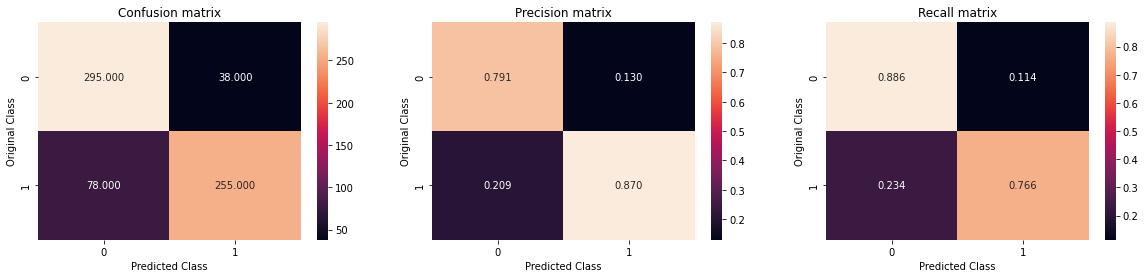

In [ ]:
plot_confusion_matrix(test_labels, y_predLr)

In [ ]:
scores = cross_val_score(lr_clf, features, labels,cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.796 (std: 0.046)



# ***Decision tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 500, random_state = 0)
clf.fit(train_features, train_labels)

DecisionTreeClassifier(max_depth=500, random_state=0)

In [ ]:
y_preddt = clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_preddt

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_preddt))


              precision    recall  f1-score   support

           0       0.74      0.79      0.76       333
           1       0.77      0.72      0.75       333

    accuracy                           0.76       666
   macro avg       0.76      0.76      0.76       666
weighted avg       0.76      0.76      0.76       666



In [ ]:
print(confusion_matrix(test_labels, y_preddt))

[[263  70]
 [ 92 241]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_preddt))

0.7567567567567568


In [ ]:
# The score method returns the accuracy of the model
score = clf.score(test_features, test_labels)
print(score)

0.7567567567567568


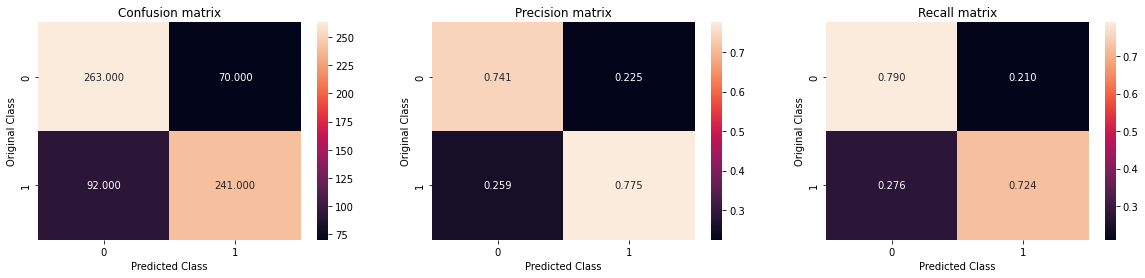

In [ ]:
plot_confusion_matrix(test_labels, y_preddt)

In [ ]:
scores = cross_val_score(clf, features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.736 (std: 0.023)



# ***SVM***

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_features, train_labels)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       333
           1       0.88      0.74      0.81       333

    accuracy                           0.82       666
   macro avg       0.83      0.82      0.82       666
weighted avg       0.83      0.82      0.82       666



In [ ]:
print(confusion_matrix(test_labels,y_pred))

[[298  35]
 [ 85 248]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.8198198198198198


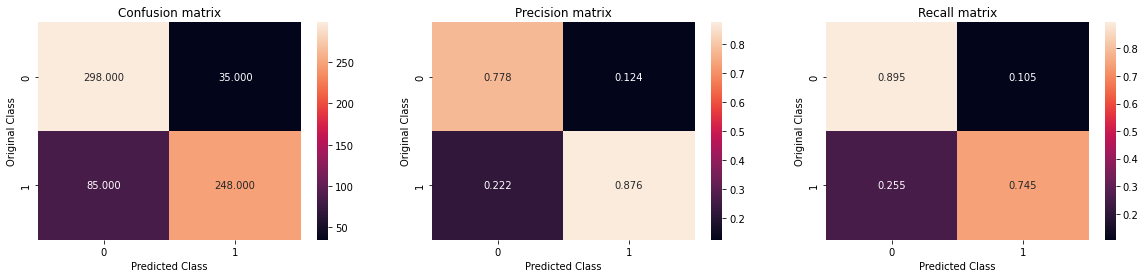

In [ ]:
plot_confusion_matrix(test_labels,y_pred)

In [ ]:
scores = cross_val_score(svclassifier,features, labels, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.794 (std: 0.043)



# ***MLP Best params***

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=300)
from sklearn.datasets import make_classification

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=300), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}


In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.818 (+/-0.064) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'sgd'}
0.802 (+/-0.087) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}
0.820 (+/-0.081) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'sgd'}
0.799 (+/-0.092) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
0.815 (+/-0.082) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'sgd'}
0.799 (+/-0.092) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'adam'}
0.818 (+/-0.061) for {'acti

In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       333
           1       0.89      0.76      0.82       333

    accuracy                           0.83       666
   macro avg       0.84      0.83      0.83       666
weighted avg       0.84      0.83      0.83       666



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[303  30]
 [ 80 253]]


In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))
clf.score(test_features, test_labels)

0.8348348348348348


0.8348348348348348

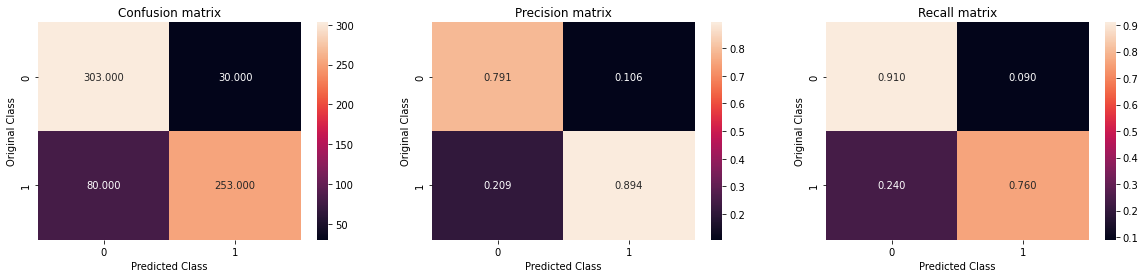

In [ ]:
plot_confusion_matrix(y_true, y_pred)

# ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(train_features, train_labels)
y_pred1 = rf.predict(test_features)
y_pred1

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       333
           1       0.90      0.72      0.80       333

    accuracy                           0.82       666
   macro avg       0.83      0.82      0.82       666
weighted avg       0.83      0.82      0.82       666



In [ ]:
print(confusion_matrix(test_labels, y_pred1))

[[305  28]
 [ 92 241]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred1))

0.8198198198198198


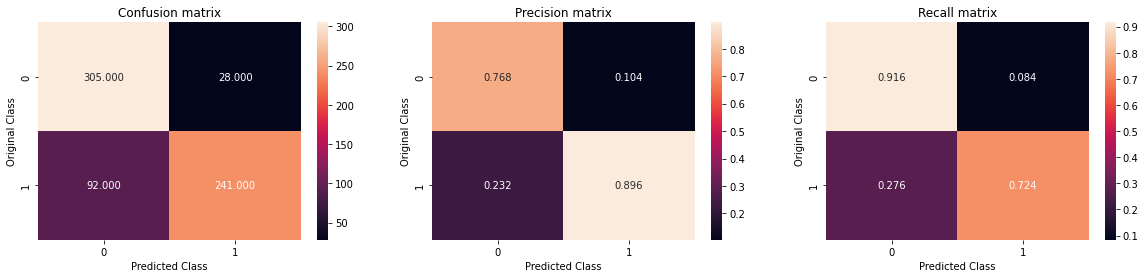

In [ ]:
plot_confusion_matrix(test_labels, y_pred1)

# ***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_labels)

GaussianNB()

In [ ]:
y_pred = gnb.predict(test_features)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.7957957957957958


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       333
           1       0.83      0.74      0.78       333

    accuracy                           0.80       666
   macro avg       0.80      0.80      0.80       666
weighted avg       0.80      0.80      0.80       666



In [ ]:
print(confusion_matrix(test_labels, y_pred))

[[283  50]
 [ 86 247]]


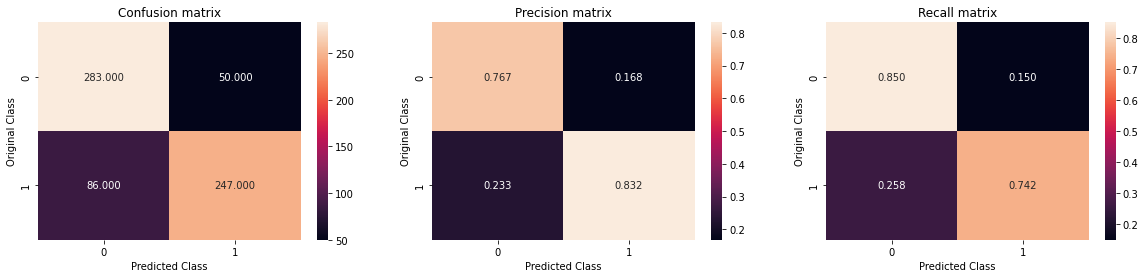

In [ ]:
plot_confusion_matrix(test_labels, y_pred)

# ***XGBoost***

In [ ]:
import xgboost as xgb
modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
modelxgb.fit(train_features, train_labels)

XGBClassifier(learning_rate=0.01, random_state=1)

In [ ]:
predxgb = modelxgb.predict(test_features)
predxgb

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,predxgb))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       333
           1       0.89      0.73      0.80       333

    accuracy                           0.82       666
   macro avg       0.83      0.82      0.82       666
weighted avg       0.83      0.82      0.82       666



In [ ]:
print(confusion_matrix(test_labels, predxgb))

[[303  30]
 [ 91 242]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predxgb))
modelxgb.score(test_features,test_labels)

0.8183183183183184


0.8183183183183184

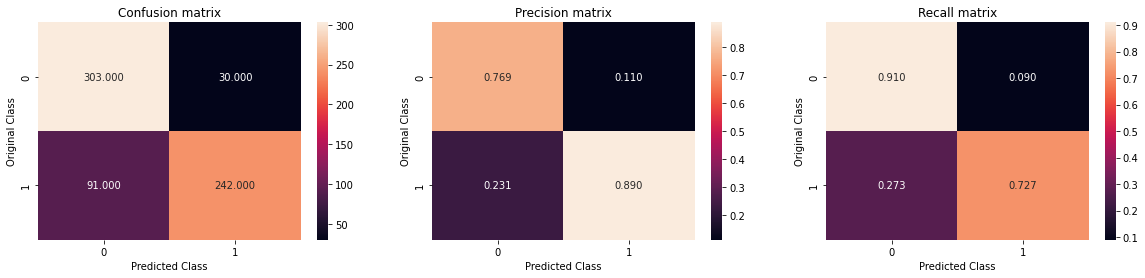

In [ ]:
plot_confusion_matrix(test_labels, predxgb)

# ***KNN***

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_features, train_labels)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_features, train_labels)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_features, test_labels)

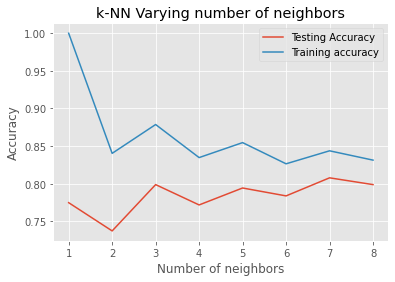

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
#Fit the model
knn.fit(train_features,train_labels)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(test_features,test_labels)

0.8078078078078078

In [ ]:
y_pred = knn.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       333
           1       0.94      0.66      0.77       333

    accuracy                           0.81       666
   macro avg       0.84      0.81      0.80       666
weighted avg       0.84      0.81      0.80       666



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels,y_pred))

[[318  15]
 [113 220]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, y_pred))

0.8078078078078078


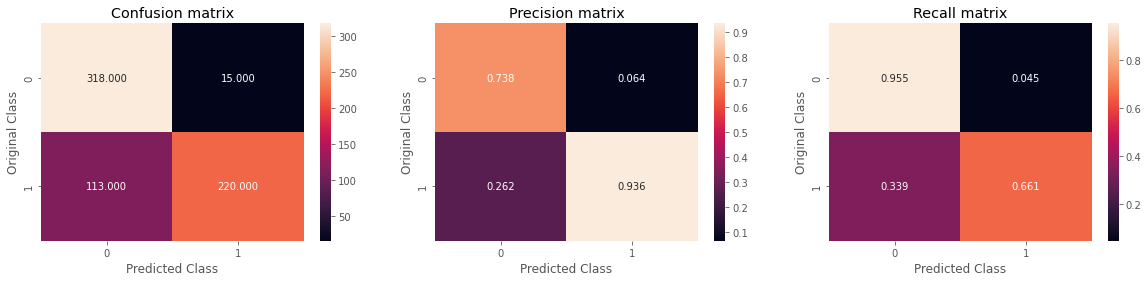

In [ ]:
plot_confusion_matrix(test_labels,y_pred)

# ***mlp***

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
model = MLPClassifier()
model.fit(train_features, train_labels)
print(model)

expected_y  = test_labels
predicted_y = model.predict(test_features)

MLPClassifier()


In [ ]:
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       333
           1       0.88      0.75      0.81       333

    accuracy                           0.82       666
   macro avg       0.83      0.82      0.82       666
weighted avg       0.83      0.82      0.82       666



In [ ]:
print(metrics.confusion_matrix(expected_y, predicted_y))

[[298  35]
 [ 82 251]]


In [ ]:
expected_y, predicted_y = test_labels , clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
predicted_y

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

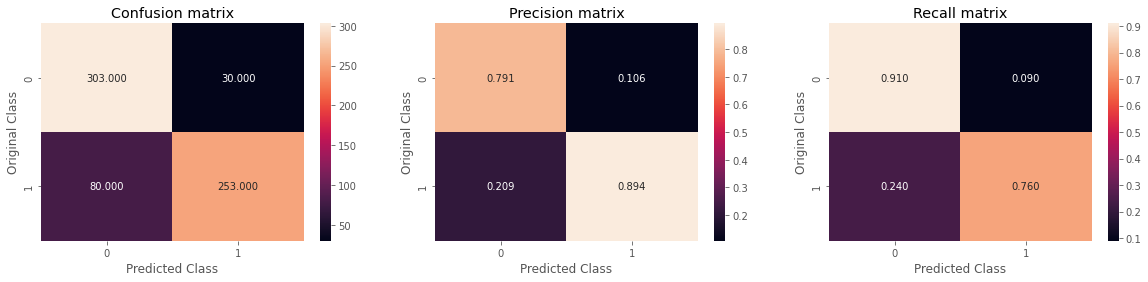

In [ ]:
plot_confusion_matrix(expected_y, predicted_y)

https://www.projectpro.io/recipes/use-mlp-classifier-and-regressor-in-python

https://python-course.eu/machine-learning/neural-networks-with-scikit.php

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [ ]:
sc=StandardScaler()

scaler = sc.fit(train_features)
trainX_scaled = scaler.transform(train_features)
testX_scaled = scaler.transform(test_features)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, train_labels)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(test_labels, y_pred)))

Accuracy: 0.85


In [ ]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       333
           1       0.89      0.79      0.84       333

    accuracy                           0.85       666
   macro avg       0.85      0.85      0.84       666
weighted avg       0.85      0.85      0.84       666



In [ ]:
y_pred = modelxgb.predict(test_features)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

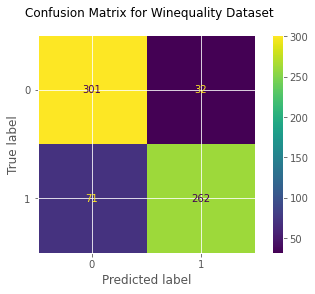

In [ ]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, test_labels, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/#mlpclassifier-for-binary-classification

## ***MLP Best params1***

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,2), max_iter = 300,activation = 'relu', solver = 'adam')
from sklearn.datasets import make_classification

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(150,100,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(train_features, train_labels)

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']})

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.804 (+/-0.054) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.808 (+/-0.061) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.807 (+/-0.072) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.812 (+/-0.086) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)
np.set_printoptions(threshold=np.inf)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       333
           1       0.90      0.74      0.81       333

    accuracy                           0.83       666
   macro avg       0.84      0.83      0.83       666
weighted avg       0.84      0.83      0.83       666



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[306  27]
 [ 87 246]]


In [ ]:
y_true, y_pred = test_labels , clf.predict(test_features)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))
clf.score(test_features, test_labels)

0.8288288288288288


0.8288288288288288

In [ ]:
def plot_confusion_matrix(test_labels, y_predLr):
    C = confusion_matrix(test_labels, y_predLr)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [0,1]
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True,  fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

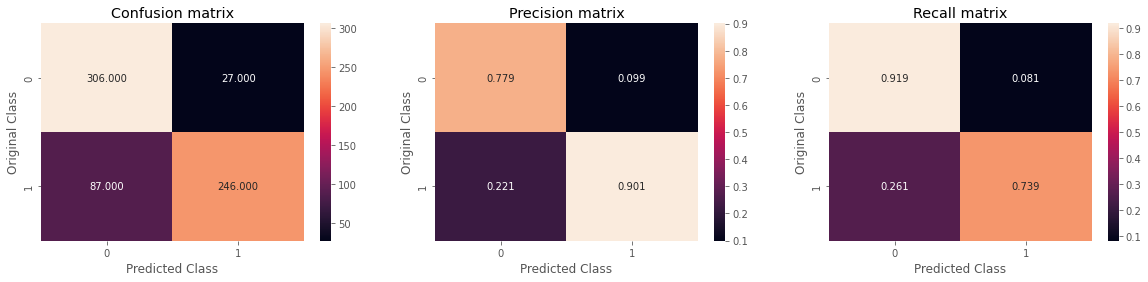

In [ ]:
plot_confusion_matrix(y_true, y_pred)